
# Prueba de reclutamiento de Python
_Favor de completar lo solicitado abajo una vez complete la prueba técnica_
- Nombre: Jasson Cordones
- Correo: jasson.cordones@hotmail.com
- LinkedIn: https://www.linkedin.com/in/jassoncordones






In [1]:
# Inicia tu código aquí
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

### Load files with data

In [2]:
# Loaded variable 'df' from URI: DATASETS/INVERSION_EXTRANJERA_DIRECTA.csv
df_inversion = pd.read_csv(r'DATASETS/INVERSION_EXTRANJERA_DIRECTA.csv',skiprows=3)
# Loaded variable 'df' from URI: DATASETS/MIGRACION_NETA.csv
df_migracion = pd.read_csv(r'DATASETS/MIGRACION_NETA.csv',skiprows=3)
# Loaded variable 'df' from URI: DATASETS/REMESAS.csv
df_remesas = pd.read_csv(r'DATASETS/REMESAS.csv',skiprows=3)
# Loaded variable 'df' from URI: /home/jasson/prueba-reclutamiento-python/DATASETS/PRODUCTO_INTERNO_BRUTO.csv
df_pib = pd.read_csv(r'DATASETS/PRODUCTO_INTERNO_BRUTO.csv',skiprows=3)

### Check dataframes shapes and columns

In [3]:
print('Inversion Shape')
print(df_inversion.shape)
print('Migracion Shape')
print(df_migracion.shape)
print('Remesas Shape')
print(df_remesas.shape)
print('PIB Shape')
print(df_pib.shape)

Inversion Shape
(266, 69)
Migracion Shape
(266, 69)
Remesas Shape
(266, 69)
PIB Shape
(266, 69)


In [4]:
print('Inversion Columns')
print(df_inversion.columns)
print('Migracion Columns')
print(df_migracion.columns)
print('Remesas Columns')
print(df_remesas.columns)
print('PIB Columns')
print(df_pib.columns)

Inversion Columns
Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', 'Unnamed: 68'],
      dtype='object')
Migracion Columns
Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '19

### Combine the dataframes

In [5]:
df_combined = pd.concat([df_inversion, df_pib, df_migracion, df_remesas], ignore_index=True)

### Rename key columns

In [6]:
# Rename column 'Country Name' to 'country_name'
df_combined = df_combined.rename(columns={'Country Name': 'country_name'})
# Rename column 'Country Code' to 'country_code'
df_combined = df_combined.rename(columns={'Country Code': 'country_code'})
# Rename column 'Indicator Name' to 'indicator_name'
df_combined = df_combined.rename(columns={'Indicator Name': 'indicator_name'})
# Rename column 'Indicator Code' to 'indicator_code'
df_combined = df_combined.rename(columns={'Indicator Code': 'indicator_code'})

### Melt combined dataframe

In [7]:
df_combined = pd.melt(df_combined,id_vars=['country_name','country_code','indicator_name','indicator_code'],
value_vars=['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1969', 
            '1968','1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
            '1978','1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', 
            '1987','1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', 
            '1996','1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', 
            '2005','2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', 
            '2014','2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', 
            '2023'],var_name='year',value_name='value')

In [8]:
# Filter rows based on column: 'country_code'
df_combined = df_combined[(df_combined['country_code'] == "CHN") | (df_combined['country_code'] == "CAN") | (df_combined['country_code'] == "USA")]

In [9]:
df_combined.reset_index(drop=True,inplace=True)

In [10]:
df_combined.indicator_name.unique()

array(['Inversión extranjera directa, entrada neta de capital (% del PIB)',
       'PIB (US$ a precios actuales)', 'Migración neta',
       'Remesas de trabajadores y compensación de empleados, recibidas (% del PIB)'],
      dtype=object)

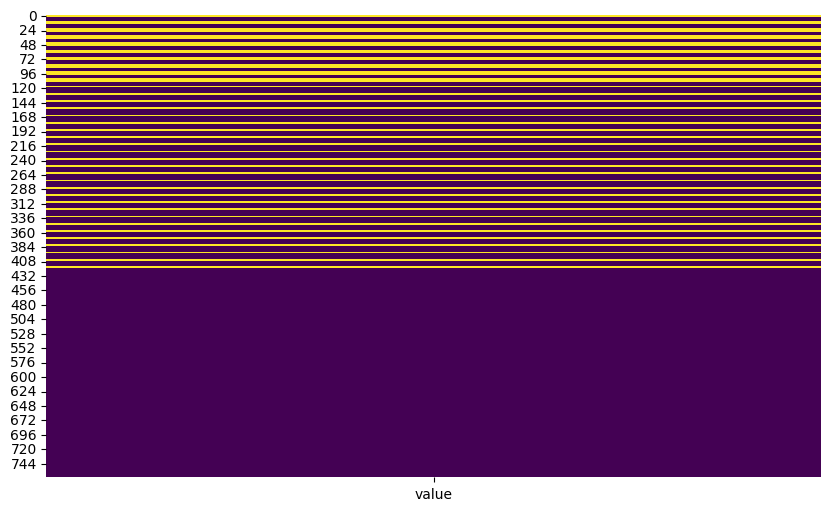

In [11]:

plt.figure(figsize=(10,6))
sns.heatmap(df_combined[df_combined['country_name']=='Canadá'][['value']].isna(), cbar=False, cmap='viridis')
plt.show()

### Remove outliers

In [12]:
# def remove_outliers(df, country_col,indicator_col, value_col):
#     countries = df[country_col].unique()  # Get unique countries
#     indicators = df[indicator_col].unique()
#     df_filtered_combined = pd.DataFrame()  # Empty DataFrame to store filtered results

#     for country in countries:
#         for indicator in indicators:
#             df_filtered = df[(df[country_col] == country)&(df[indicator_col] == indicator)]  # Filter by country
            
#             # Calculate IQR for the specific country
#             Q1 = df_filtered[value_col].quantile(0.25)
#             Q3 = df_filtered[value_col].quantile(0.75)
#             IQR = Q3 - Q1

#             # Define outlier boundaries
#             lower_bound = Q1 - 1.5 * IQR
#             upper_bound = Q3 + 1.5 * IQR

#             # Remove outliers for the country
#             df_filtered = df_filtered[(df_filtered[value_col] >= lower_bound) & (df_filtered[value_col] <= upper_bound)]
            
#             # Append filtered data to the combined DataFrame
#             df_filtered_combined = pd.concat([df_filtered_combined, df_filtered])

#     return df_filtered_combined.reset_index(drop=True)

# df_cleaned = remove_outliers(df_combined, 'country_name', 'indicator_name','value')

### Sort values

In [13]:
df_combined = df_combined.sort_values(['year','country_name', ])

In [14]:
df_combined = df_combined.dropna(axis=0,how='any')

In [15]:
df_combined.reset_index(drop=True,inplace=True)

In [16]:
df_combined

,country_name,country_code,indicator_name,indicator_code,year,value
0,Canadá,CAN,PIB (US$ a precios actuales),NY.GDP.MKTP.CD,1960,4.056377e+10
1,Canadá,CAN,Migración neta,SM.POP.NETM,1960,4.452700e+04
2,China,CHN,PIB (US$ a precios actuales),NY.GDP.MKTP.CD,1960,5.971625e+10
3,China,CHN,Migración neta,SM.POP.NETM,1960,-1.185190e+05
4,Estados Unidos,USA,PIB (US$ a precios actuales),NY.GDP.MKTP.CD,1960,5.419886e+11
...,...,...,...,...,...,...
650,China,CHN,Remesas de trabajadores y compensación de empl...,BX.TRF.PWKR.DT.GD.ZS,2023,1.635888e-01
651,Estados Unidos,USA,"Inversión extranjera directa, entrada neta de ...",BX.KLT.DINV.WD.GD.ZS,2023,1.274752e+00
652,Estados Unidos,USA,PIB (US$ a precios actuales),NY.GDP.MKTP.CD,2023,2.736094e+13
653,Estados Unidos,USA,Migración neta,SM.POP.NETM,2023,9.997000e+05


In [17]:
#df_combined.to_csv('df_combined_pivot.csv')

## Print summary

In [18]:
df_combined.groupby(['indicator_name','country_name'])['value'].describe().map(lambda x: f'{x:,.2f}')


count  \
indicator_name                                     country_name            
Inversión extranjera directa, entrada neta de c... Canadá          54.00   
                                                   China           45.00   
                                                   Estados Unidos  54.00   
Migración neta                                     Canadá          64.00   
                                                   China           64.00   
                                                   Estados Unidos  64.00   
PIB (US$ a precios actuales)                       Canadá          64.00   
                                                   China           64.00   
                                                   Estados Unidos  64.00   
Remesas de trabajadores y compensación de emple... Canadá          29.00   
                                                   China           42.00   
                                                   Estados Unidos  47.00   

                                                                                   mean  \
indicator_name                                     country_name                           
Inversión extranjera directa, entrada neta de c... Canadá                          2.31   
                                                   China                           2.47   
                                                   Estados Unidos                  1.17   
Migración neta                                     Canadá                    159,173.75   
                                                   China                    -266,722.39   
                                                   Estados Unidos          1,048,512.25   
PIB (US$ a precios actuales)                       Canadá            755,211,828,303.25   
                                                   China           3,291,242,376,142.75   
                                                   Estados Unidos  8,536,365,957,974.14   
Remesas de trabajadores y compensación de emple... Canadá                          0.07   
                                                   China                           0.17   
                                                   Estados Unidos                  0.03   

                                                                                    std  \
indicator_name                                     country_name                           
Inversión extranjera directa, entrada neta de c... Canadá                          1.67   
                                                   China                           1.73   
                                                   Estados Unidos                  0.84   
Migración neta                                     Canadá                     89,526.82   
                                                   China                     213,719.56   
                                                   Estados Unidos            398,382.09   
PIB (US$ a precios actuales)                       Canadá            662,792,292,219.68   
                                                   China           5,244,326,745,809.47   
                                                   Estados Unidos  7,425,184,368,282.92   
Remesas de trabajadores y compensación de emple... Canadá                          0.01   
                                                   China                           0.09   
                                                   Estados Unidos                  0.01   

                                                                                  min  \
indicator_name                                     country_name                         
Inversión extranjera directa, entrada neta de c... Canadá                        0.03   
                                                   China                         0.00   
                                                   Estados Unidos                0.07   
Migraci

In [19]:
df_combined[df_combined['country_name']=='China'][['country_name','indicator_name','year','value']]

,country_name,indicator_name,year,value
2,China,PIB (US$ a precios actuales),1960,5.971625e+10
3,China,Migración neta,1960,-1.185190e+05
8,China,PIB (US$ a precios actuales),1961,5.005669e+10
9,China,Migración neta,1961,-1.790640e+05
14,China,PIB (US$ a precios actuales),1962,4.720919e+10
...,...,...,...,...
638,China,Remesas de trabajadores y compensación de empl...,2022,1.459230e-01
647,China,"Inversión extranjera directa, entrada neta de ...",2023,2.401135e-01
648,China,PIB (US$ a precios actuales),2023,1.779478e+13
649,China,Migración neta,2023,-3.102200e+05


### Plot distributions

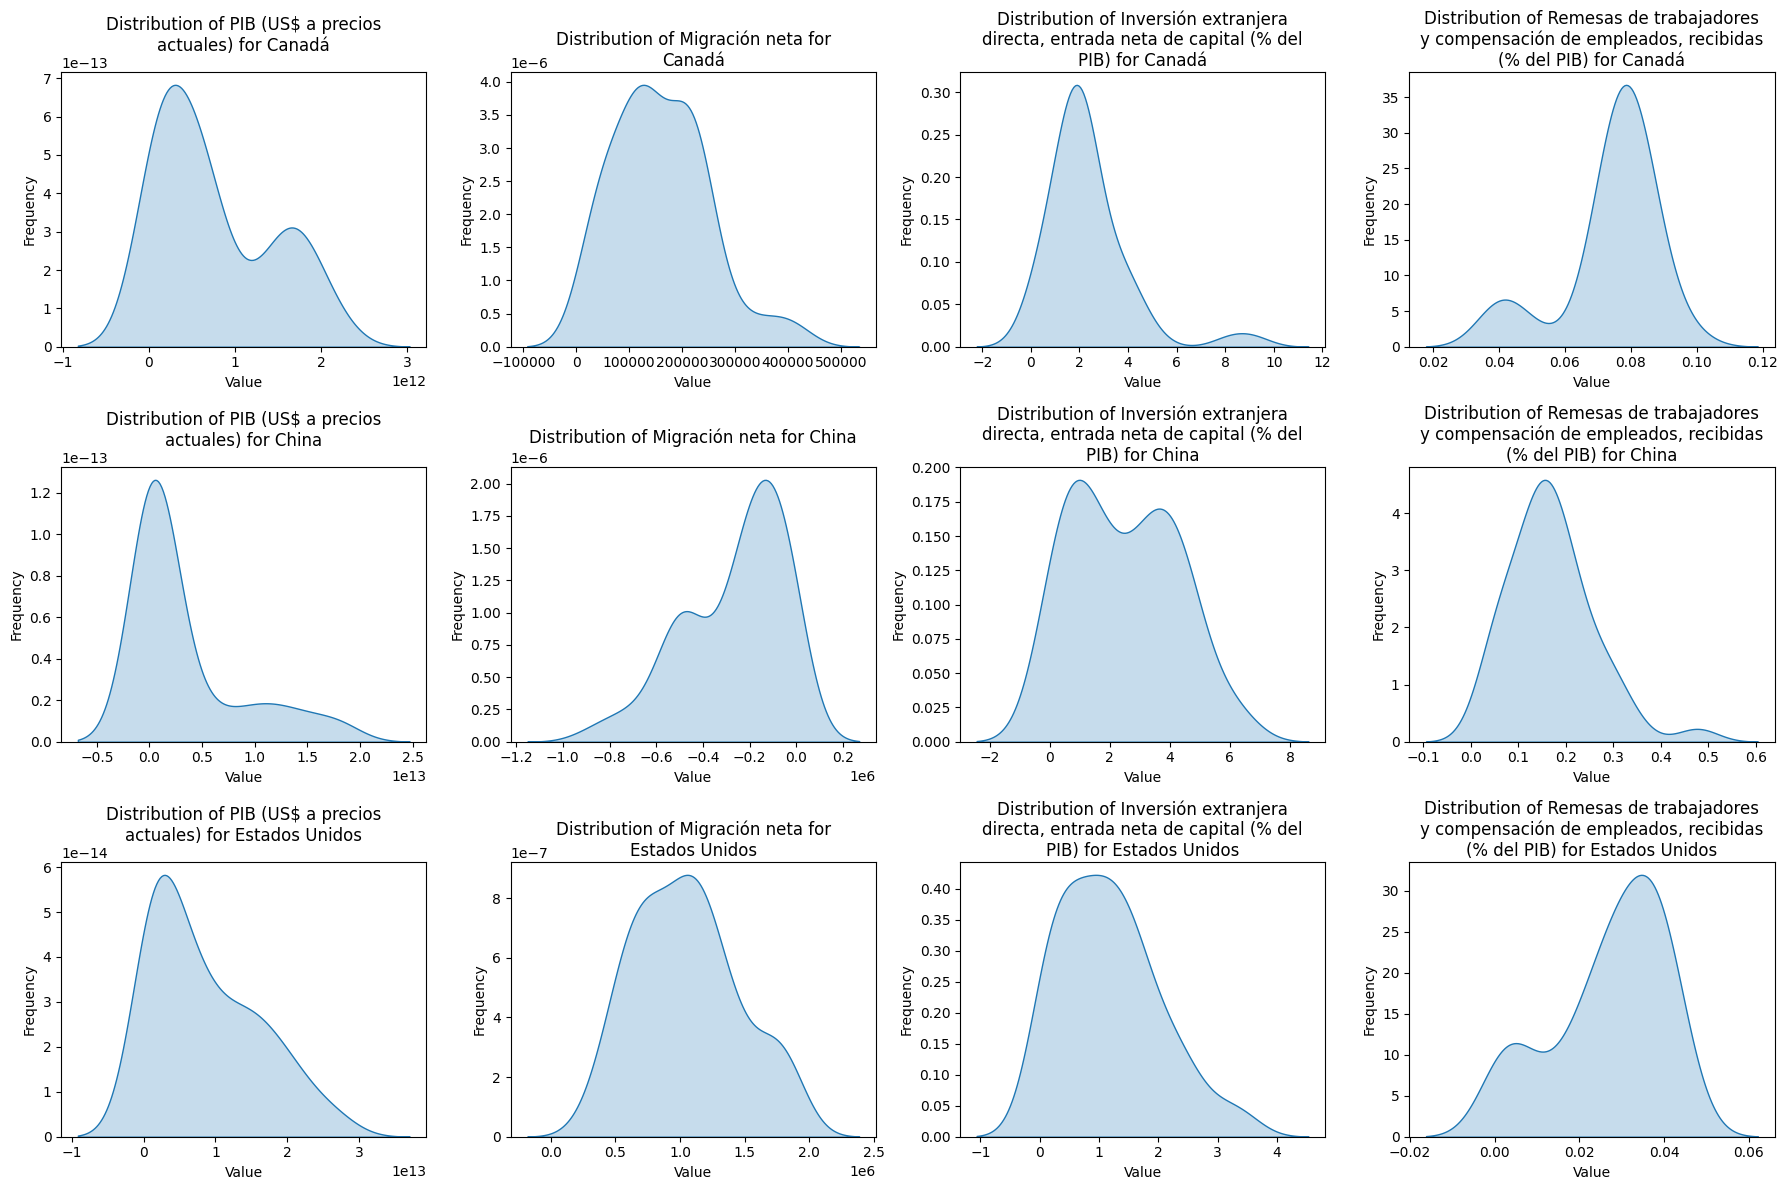

In [26]:
import textwrap
countries = df_combined['country_name'].unique()
indicators = df_combined['indicator_name'].unique()
fig, axes = plt.subplots(len(countries), len(indicators), figsize=(18, 12))
# plt.xticks(ticks=range(df_combined['year'].min(), df_combined['year'].max() + 1, 1),rotation=90)
for i, country in enumerate(countries):
    for j, indicator in enumerate(indicators):
        df_filtered = df_combined[(df_combined['country_name']==country)&(df_combined['indicator_name']==indicator)]

        # Histogram with KDE
        sns.kdeplot(df_filtered['value'], fill=True, ax=axes[i,j])
        title = f'Distribution of {indicator} for {country}'
        wrapped_title = '\n'.join(textwrap.wrap(title, width=40)) 
        axes[i,j].set_title(wrapped_title,wrap=True)
        axes[i,j].set_xlabel('Value')
        axes[i,j].set_ylabel('Frequency')
plt.tight_layout()
# plt.savefig('distributions.png')
plt.show()

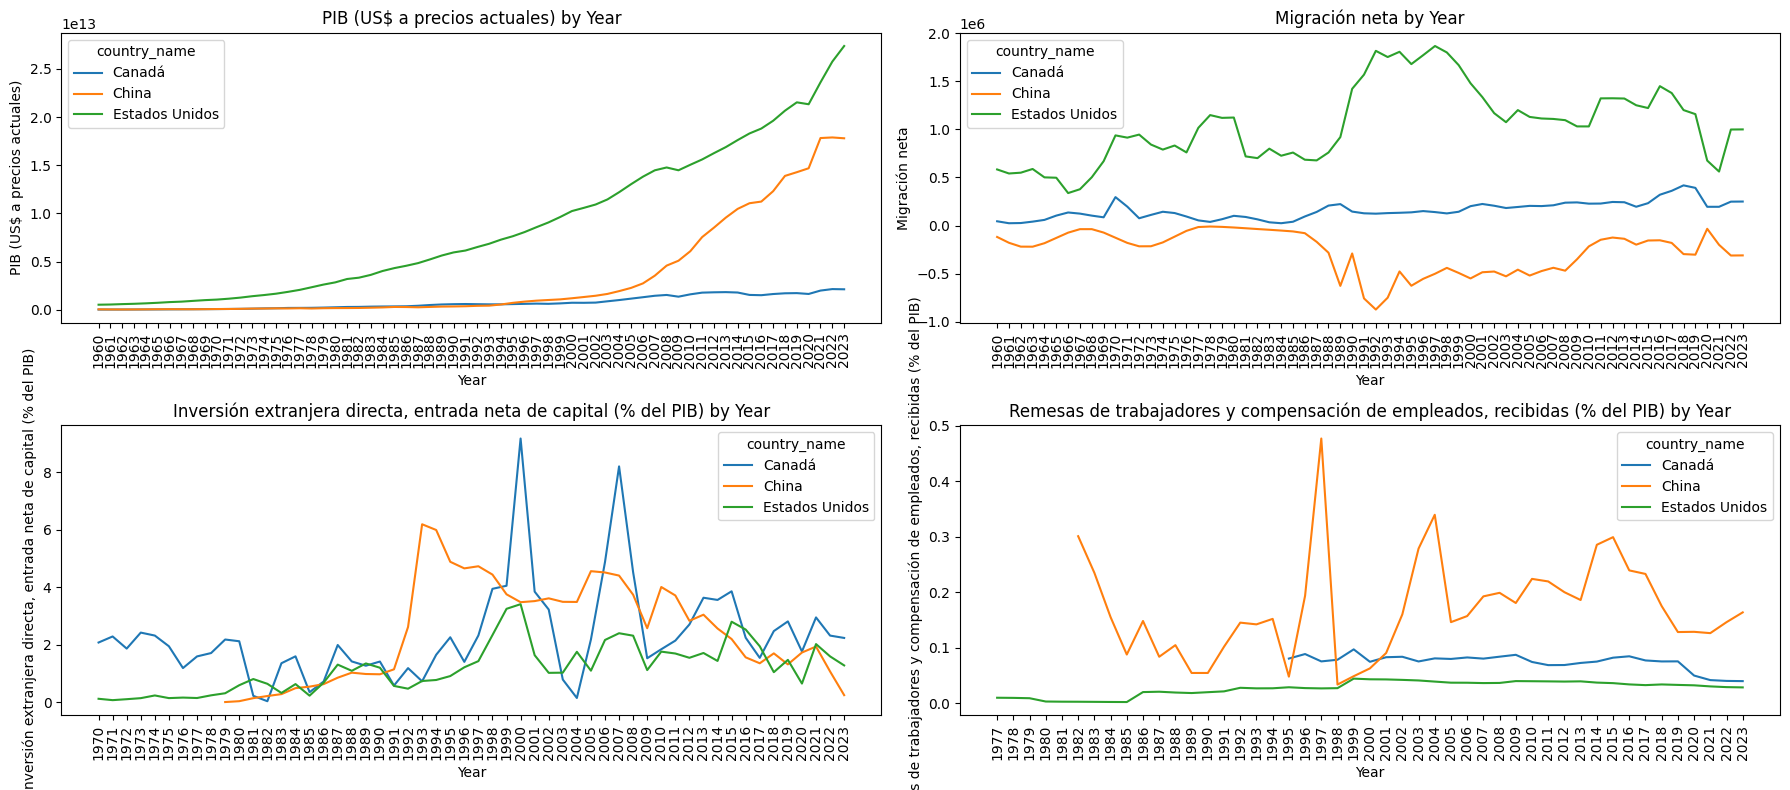

In [25]:

countries = df_combined['country_name'].unique()
indicators = df_combined['indicator_name'].unique()
fig, axes = plt.subplots(2, 2, figsize=(18, 8))
axes = axes.flatten()

for i, indicator in enumerate(indicators):
    sns.lineplot(data=df_combined[(df_combined['indicator_name']==indicator)], x='year', y='value', hue='country_name',ax=axes[i],hue_order=countries)


    axes[i].set_xticks(df_combined[(df_combined['indicator_name']==indicator)]['year'].unique())
    axes[i].set_xticklabels(df_combined[(df_combined['indicator_name']==indicator)]['year'].unique(), rotation=90)
    
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel(f'{indicator}')
    axes[i].set_title(f'{indicator} by Year')

plt.tight_layout()
plt.show()

### Observaciones a partir de la Tabla de Summary Statistics:

#### 1. **Inversión Extranjera Directa (% of GDP)**
   - **Canadá** tiene un promedio de 2,31%, con un rango que va desde 0,03% a 9,17%. Esto sugiere niveles relativamente bajos pero consistentes de inversión extranjera directa (IED) en comparación con el PIB. El valor máximo (9,17%) indica que puede haber habido algunos años excepcionales con una mayor participación de la IED en el PIB.
   - **China** muestra un promedio de 2,47%, con un máximo de 6,19% y un mínimo de 0,00%. Esto indica una tendencia más volátil, con IED nula o casi nula en algunos años. El rango de valores indica que la IED en China ha mostrado una variación significativa a lo largo del tiempo.
   - **Estados Unidos** tiene un promedio de 1,17%, con un valor mínimo de 0,07% a un valor máximo de 3,41%. En comparación con Canadá y China, EE. UU. tiene el promedio más bajo de IED como porcentaje del PIB, y los datos son relativamente estables, con valores menos extremos que en China.

#### 2. **Migración Neta (Net Migration)**
   - **Canadá** tiene una migración neta promedio de 159.173 con una desviación estándar de 89.527. Esto muestra un nivel de migración bastante alto y constante, con una variación significativa entre años (mín. 24.186 y máx. 417.974).
   - **China** tiene una media negativa de -266.722, lo que indica una salida neta de migrantes. La variación es mucho mayor (va desde -873.177 hasta -9.923), lo que sugiere fluctuaciones significativas en la migración.
   - **Estados Unidos** tiene una media positiva de 1.048.512 con una desviación estándar de 398.382, lo que refleja una migración positiva constante a lo largo de los años. El rango (que va desde 337.814 hasta 1.866.819) muestra que Estados Unidos experimentó fluctuaciones en la migración, pero en promedio, ha tenido un alto nivel de inmigración.

#### 3. **PIB (GDP) in US$**
   - **Canadá** tiene un PIB promedio de 755 mil millones de dólares, pero el rango es muy amplio, desde aproximadamente 40,5 mil millones de dólares hasta 2,16 billones de dólares, lo que indica una variación significativa en la producción económica de Canadá a lo largo del tiempo.
   - **China** muestra un PIB considerablemente más alto en promedio (3,29 billones de dólares), con un diferencial muy grande, que va desde los 47 mil millones de dólares hasta los 17,88 billones de dólares, lo que refleja el crecimiento económico masivo y rápido de China durante el período.
   - **Estados Unidos** tiene el PIB promedio más alto, con 8,54 billones de dólares, con valores que van desde los 542 mil millones de dólares hasta los 27,36 billones de dólares, lo que muestra la economía más grande entre los tres países con una variación considerable, probablemente debido a auges y recesiones económicas.

#### 4. **Remesas de Trabajadores (% del PIB) (Remittances as % of GDP)**
   - **Canadá** tiene un promedio bajo de 0,07% del PIB, con valores que van del 0,04% al 0,10%. Esto sugiere que las remesas son una porción relativamente pequeña del PIB de Canadá.
   - **China** muestra un promedio más alto (0,17%) y un rango de 0,03% a 0,48%. Los valores más altos indican que las remesas podrían tener un papel más significativo en la economía de China, lo que refleja el alto número de inmigrantes chinos que trabajan en el extranjero.
   - **Estados Unidos** tiene el promedio más bajo, 0,03%, con valores que van del 0,00% al 0,04%. Dado el tamaño de la economía estadounidense, las remesas como porcentaje del PIB son mínimas, pero aún reflejan el gran flujo de trabajadores inmigrantes de Estados Unidos.


### Observaciones:
- **PIB**: Estados Unidos tiene el PIB más alto, seguido de China y luego Canadá, lo que refleja el tamaño relativo de sus economías.
- **IED (% del PIB)**: Canadá y China tienen una IED más alta en relación con el PIB en comparación con Estados Unidos.
- **Migración**: Estados Unidos experimenta una migración positiva, Canadá tiene niveles de migración relativamente estables, mientras que China tiene flujos migratorios netos.
- **Remesas**: China muestra la mayor proporción de remesas en relación con el PIB, seguida de Canadá y Estados Unidos con una proporción mínima.

### Implicaciones:
- **IED y crecimiento económico**: Países como Canadá y China dependen más de la inversión extranjera en comparación con los EE. UU., lo que podría indicar diferencias en sus estrategias económicas o etapas de desarrollo.
- **Impacto de la migración**: Las tendencias de migración neta reflejan diversos factores sociopolíticos; la migración negativa de China puede reflejar dinámicas o restricciones de migración interna, mientras que Canadá y los EE. UU. tienen una migración neta positiva, lo que indica su papel como destinos de migración.
- **Remesas**: El mayor porcentaje de remesas de China destaca el papel significativo de los trabajadores chinos en el extranjero y su impacto en la economía, mientras que los porcentajes más pequeños de Canadá y los EE. UU. pueden reflejar diferentes demografías de migrantes o una menor dependencia de las remesas.


# Part 2 - Projection and confidence levels 

### 1. Descripción de la variable respuesta

Las variables respuesta son las cuatro variables seleccionadas para cada país: PIB, Migración neta, Remesas e Inversión extranjera directa (IED). Estas variables son cruciales para el análisis económico, y se espera que su comportamiento futuro dependa de tendencias pasadas y factores económicos internacionales y nacionales.

- PIB (US$ a precios actuales): Representa el valor total de los bienes y servicios producidos dentro de un país durante un periodo de tiempo específico, expresado en dólares estadounidenses.
- Migración neta: Representa la diferencia entre el número de inmigrantes y emigrantes en un país en un período determinado.
- Remesas: Transferencias de dinero enviadas por migrantes a sus países de origen.
- Inversión Extranjera Directa (IED): Capital invertido por empresas extranjeras en la economía de un país.

### 2. Hipótesis estadística

La proyección de estas variables debe basarse en las tendencias históricas, por lo que formulamos la siguiente hipótesis estadística para cada variable:

- Hipótesis nula (H₀): El comportamiento de la variable respuesta seguirá una tendencia lineal constante o predecible para los próximos 5 años.

- Hipótesis alternativa (H₁): La variable respuesta no sigue una tendencia constante y los valores futuros no son predecibles con certeza.

In [36]:
# Define a function to compute predictions and confidence intervals
def calculate_predictions_and_ci(data, confidence_level=0.90):
    results = []
    
    # Get unique combinations of country_name and indicator_name
    country_indicator_groups = data.groupby(['country_name', 'indicator_name'])
    
    data['year'] = pd.to_numeric(data['year'])
    # Loop through each country and indicator
    for (country, indicator), group in country_indicator_groups:

        # Prepare the data for regression
        X = group['year']
        y = group['value']
        
        # Add constant to the model (intercept)
        # X = sm.add_constant(X)
        
        # Fit the regression model
        model = sm.GLS(y, X).fit()
        
        # Project for the next 5 years (2024-2028)
        future_years = pd.DataFrame({'year': np.arange(2024, 2029)})
        # future_years = sm.add_constant(future_years)
        predictions = model.predict(future_years)
        
        # Calculate confidence intervals
        residuals = model.resid
        std_error = np.std(residuals)
        n = len(group)
        t_value = stats.t.ppf((1 + confidence_level) / 2, n - 2)
        margin_error = t_value * std_error / np.sqrt(n)
        
        ci_lower = predictions - margin_error
        ci_upper = predictions + margin_error
        
        # Store the results
        for i, year in enumerate(np.arange(2024, 2029)):
            results.append({
                'country_name': country,
                'indicator_name': indicator,
                'year': year,
                'prediction': predictions[i],
                'ci_lower': ci_lower[i],
                'ci_upper': ci_upper[i]
            })
    
    return pd.DataFrame(results)


# Apply the function to calculate predictions and confidence intervals
predictions_df = calculate_predictions_and_ci(df_combined)


# predictions_df['prediction']=predictions_df['prediction'].map(lambda x: f'{x:,.2f}')
# predictions_df['ci_lower']=predictions_df['ci_lower'].map(lambda x: f'{x:,.2f}')
# predictions_df['ci_upper']=predictions_df['ci_upper'].map(lambda x: f'{x:,.2f}')
predictions_df


,country_name,indicator_name,year,prediction,ci_lower,ci_upper
0,Canadá,"Inversión extranjera directa, entrada neta de ...",2024,2.341439e+00,1.964961e+00,2.717916e+00
1,Canadá,"Inversión extranjera directa, entrada neta de ...",2025,2.342596e+00,1.966118e+00,2.719073e+00
2,Canadá,"Inversión extranjera directa, entrada neta de ...",2026,2.343752e+00,1.967275e+00,2.720230e+00
3,Canadá,"Inversión extranjera directa, entrada neta de ...",2027,2.344909e+00,1.968432e+00,2.721387e+00
4,Canadá,"Inversión extranjera directa, entrada neta de ...",2028,2.346066e+00,1.969589e+00,2.722544e+00
5,Canadá,Migración neta,2024,1.623864e+05,1.440776e+05,1.806951e+05
6,Canadá,Migración neta,2025,1.624666e+05,1.441579e+05,1.807753e+05
7,Canadá,Migración neta,2026,1.625468e+05,1.442381e+05,1.808556e+05
8,Canadá,Migración neta,2027,1.626271e+05,1.443183e+05,1.809358e+05
9,Canadá,Migración neta,2028,1.627073e+05,1.443985e+05,1.810160e+05


### Calcular la media de los 5 años proyectados para cada variable

In [37]:
predictions_df.groupby(['country_name', 'indicator_name'])['prediction'].mean().map(lambda x: f'{x:,.2f}')


country_name    indicator_name                                                            
Canadá          Inversión extranjera directa, entrada neta de capital (% del PIB)                             2.34
                Migración neta                                                                          162,546.83
                PIB (US$ a precios actuales)                                                    774,115,387,625.24
                Remesas de trabajadores y compensación de empleados, recibidas (% del PIB)                    0.07
China           Inversión extranjera directa, entrada neta de capital (% del PIB)                             2.50
                Migración neta                                                                         -272,000.87
                PIB (US$ a precios actuales)                                                  3,386,921,564,825.24
                Remesas de trabajadores y compensación de empleados, recibidas (% del PIB)              

In [38]:
# p = predictions_df[(predictions_df['country_name']=='China') & (predictions_df['indicator_name']=='Inversión extranjera directa, entrada neta de capital (% del PIB)')]
# p['year'].astype('object')
# p

,country_name,indicator_name,year,prediction,ci_lower,ci_upper
20,China,"Inversión extranjera directa, entrada neta de ...",2024,2.497635,2.068621,2.926650
21,China,"Inversión extranjera directa, entrada neta de ...",2025,2.498869,2.069855,2.927884
22,China,"Inversión extranjera directa, entrada neta de ...",2026,2.500103,2.071089,2.929118
23,China,"Inversión extranjera directa, entrada neta de ...",2027,2.501337,2.072323,2.930352
24,China,"Inversión extranjera directa, entrada neta de ...",2028,2.502571,2.073557,2.931586


In [62]:
# d = df_inversion_clean[(df_inversion_clean['country_name']=='China') & (df_inversion_clean['indicator_name']=='Inversión extranjera directa, entrada neta de capital (% del PIB)')]
# d.reset_index(drop=True,inplace=True)

In [63]:

combined_df = pd.concat([d[['country_name','indicator_name','year', 'value']], p[['country_name','indicator_name','year', 'prediction']].rename(columns={'prediction': 'value'})])
combined_df['year'] = combined_df['year'].astype('int')
combined_df.reset_index(drop=True,inplace=True)

In [ ]:
combined_df

In [39]:
plt.figure(figsize=(12, 8))
plt.xticks(ticks=range(combined_df['year'].min(), combined_df['year'].max() + 1, 1),rotation=90)  # every year
sns.lineplot(data=combined_df, x='year', y='value', hue='country_name')
# sns.lineplot(data=p, x='year', y='prediction', hue='country_name')

# plt.plot(combined_df['year'], combined_df['value'], label='Original Data', color='blue', marker='o')

# Step 2: Plot the predictions
# plt.plot(p['year'], p['prediction'], label='Predictions', color='red', linestyle='--', marker='x')

# plt.tight_layout()
plt.show()

NameError: name 'combined_df' is not defined

<Figure size 1200x800 with 0 Axes>

In [45]:
def projection(df,years_ahead=5,conf_level=0.9):
    countries = df['country_name'].unique()
    all_predictions = []
    
    df['year'] = pd.to_numeric(df['year'])
    for country in countries:
        country_data = df[df['country_name'] == country]

        X = country_data['year']
        Y = country_data['value']
        # X = sm.add_constant(X)

        model = sm.OLS(Y,X).fit()

        last_year = country_data['year'].max()
        future_years = pd.DataFrame({'year': np.arange(last_year + 1, last_year + years_ahead +1 )})

        future_predictions = model.predict(future_years)

        country_predictions = pd.DataFrame({'country_name':country,'year': future_years['year'], 'value': future_predictions})

        all_predictions.append(country_predictions)  

        predictions = pd.concat(all_predictions, ignore_index=True)
        predictions['year'] = predictions['year'].astype('object')


    return predictions


In [46]:
def country_mean_with_ci(df, conf_level=0.9):
    # Group by country and calculate mean and standard error
    grouped = df.groupby('country_name')['value'].agg(['mean', 'std', 'count'])
    
    # Calculate standard error of the mean
    grouped['std_error'] = grouped['std'] / np.sqrt(grouped['count'])
    
    # Calculate the t-value for the given confidence level (90%)
    t_value = stats.t.ppf((1 + conf_level) / 2, df=grouped['count'] - 1)  # degrees of freedom
    
    # Calculate margin of error
    grouped['margin_error'] = t_value * grouped['std_error']
    
    # Calculate confidence intervals
    grouped['lower_ci'] = grouped['mean'] - grouped['margin_error']
    grouped['upper_ci'] = grouped['mean'] + grouped['margin_error']
    
    # Reset index to make 'country_name' a column
    grouped = grouped.reset_index()

    return grouped[['country_name', 'mean', 'lower_ci', 'upper_ci']]

In [ ]:
df_inversion_prediccion = projection(df_inversion_clean)
df_inversion_prediccion

In [ ]:
country_mean_with_ci(df_inversion_prediccion)

In [ ]:
df_migracion_prediccion = projection(df_migracion_clean)
df_migracion_prediccion

In [ ]:
country_mean_with_ci(df_migracion_prediccion)

In [ ]:
df_remesas_prediccion = projection(df_remesas_clean)
df_remesas_prediccion

In [ ]:
country_mean_with_ci(df_remesas_prediccion)

In [ ]:
df_pib_prediccion = projection(df_pib_clean)
df_pib_prediccion

In [ ]:
country_mean_with_ci(df_pib_prediccion)

# Part 3

In [47]:
df_combined = pd.concat([df_inversion_clean, df_pib_clean, df_migracion_clean, df_remesas_clean], ignore_index=True)
df_combined = df_combined.pivot_table(index=['country_name', 'country_code', 'year'], 
                                      columns='indicator_name', 
                                      values='value', 
                                      aggfunc='first').reset_index()

In [48]:
df_combined
df_combined['year'] = df_combined['year'].astype('object')

In [ ]:
# Calculate correlation by country
corr_methods = {'pearson': {}, 'spearman': {}, 'kendall': {}}

for country in df_combined['country_name'].unique():
    country_data = df_combined[df_combined['country_name'] == country].drop(columns='country_name')

    # Calculate the correlation matrix
    corr_methods['pearson'][country] = country_data.corr(method='pearson',numeric_only=True)
    corr_methods['spearman'][country]  = country_data.corr(method='spearman',numeric_only=True)
    corr_methods['kendall'][country]  = country_data.corr(method='kendall',numeric_only=True)

    # Rename cloumns
    corr_methods['pearson'][country].rename(columns=custom_labels, index=custom_labels, inplace=True)
    corr_methods['spearman'][country].rename(columns=custom_labels, index=custom_labels, inplace=True)
    corr_methods['kendall'][country].rename(columns=custom_labels, index=custom_labels, inplace=True)

    # Store the correlation matrix for each country


In [ ]:
fig, axes = plt.subplots(len(corr_methods), len(df_combined['country_name'].unique()), figsize=(18, 8))

custom_labels = {
    'Inversión extranjera directa, entrada neta de capital (% del PIB)': 'FDI',
    'PIB (US$ a precios actuales)': 'PIB',
    'Migración neta': 'Net Migration',
    'Remesas de trabajadores y compensación de empleados, recibidas (% del PIB)': 'Remittances'
}

# Loop over the methods and countries to plot each correlation matrix
for i, (method, countries_corr) in enumerate(corr_methods.items()):
    for j, country in enumerate(countries_corr):
        sns.heatmap(countries_corr[country], annot=True, fmt='.2f', linewidths=0.5, ax=axes[i, j])
        axes[i, j].set_title(f'{method.capitalize()} - {country}')
        axes[i, j].set_xticklabels(axes[i, j].get_xticklabels(), rotation=45, ha='right')
        axes[i,j].set_xlabel("")  # Remove the x-axis label
        axes[i,j].set_ylabel("")  # Remove the y-axis label
        # if j != 0:
        #     axes[i,j].set_yticklabels([]) 
        if i != 2:
            axes[i,j].set_xticklabels([]) 

# plt.tight_layout()  # Ensure the plots fit within the figure
plt.show()

# Part 4 - Regresion Analysis

In [ ]:
df_pivot = df_cleaned.pivot_table(index=['country_name', 'year'], columns='indicator_name', values='value').reset_index()
df_pivot

In [ ]:
def perform_regression(df, country):
    country_data = df[df['country_name'] == country]
    X = country_data.drop(columns=['country_name', 'year', 'PIB (US$ a precios actuales)']).fillna(0)
    y = country_data['PIB (US$ a precios actuales)']
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    return model.summary()

countries = df_cleaned['country_name'].unique()
for country in countries:
    reg = perform_regression(df_pivot, country)
    print(f'Regresion for country: {country}')
    print(reg)

In [ ]:
# 2. Correlation Matrix
correlation_matrix = df_pivot.corr()

In [ ]:
sns.pairplot(df_pivot.drop(columns=['country_name', 'year']).dropna())
plt.show()

# Part 5 - Conclusion

# Micsc

In [13]:
df_inversion_clean.to_csv('CLEAN/inversion.csv')
df_migracion_clean.to_csv('CLEAN/migracion.csv')
df_remesas_clean.to_csv('CLEAN/remesas.csv')
df_pib_clean.to_csv('CLEAN/pib.csv')